In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, TensorDataset
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

In [35]:
# train_x, train_y = [], []
# test_x, test_y = [], []
# valid_x, valid_y = [], []

# def load_images_and_labels(root_folder):
#     for folder_name in os.listdir(root_folder):
#         if not os.path.isdir(os.path.join(root_folder, folder_name)):
#             continue

#         # Convert folder name (label) to a list of integers
#         label = [int(digit) for digit in folder_name]
#         if(label[0]==label[1]):
#             continue

#         for image_name in os.listdir(os.path.join(root_folder, folder_name)):
#             if image_name.endswith(".png"):  # Assuming images are in PNG format
#                 image_path = os.path.join(root_folder, folder_name, image_name)

#                 # Open the image and convert it to grayscale
#                 image = Image.open(image_path).convert('L')

#                 # Convert the image to a numpy array
#                 image_array = np.array(image)

#                 # Normalize pixel values (optional)
#                 image_array = image_array / 255.0

#                 if "train" in root_folder:
#                     train_x.append(image)
#                     train_y.append(label)
#                 elif "test" in root_folder:
#                     test_x.append(image)
#                     test_y.append(label)
#                 elif "val" in root_folder:
#                     valid_x.append(image)
#                     valid_y.append(label)


# load_images_and_labels("double_mnist/train")
# load_images_and_labels("double_mnist/val")
# load_images_and_labels("double_mnist/test")
# # print(train_x[0])
# # for i in range(len(train_x)):
# #     print(train_x[i], train_y[i])

In [38]:
# # Convert train_x, train_y, valid_x, valid_y, test_x, and test_y to PyTorch tensors
# # print(train_x)
# train_x = torch.tensor(train_x, dtype=)
# train_y = torch.tensor(train_y, dtype=torch.int64)
# valid_x = torch.tensor(valid_x, dtype=torch.float32)
# valid_y = torch.tensor(valid_y, dtype=torch.int64)
# test_x = torch.tensor(test_x, dtype=torch.float32)
# test_y = torch.tensor(test_y, dtype=torch.int64)

# # Create TensorDatasets for train, validation, and test
# train_dataset = TensorDataset(torch.tensor(train_x), torch.tensor(train_y))
# valid_dataset = TensorDataset(torch.tensor(valid_x), torch.tensor(valid_y))
# test_dataset = TensorDataset(torch.tensor(test_x), torch.tensor(test_y))
# # Set batch size for each DataLoader
# batch_size = 32  # You can adjust this based on your hardware and needs

# # Create DataLoader instances for train, validation, and test
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# val_loader = DataLoader(valid_dataset, batch_size=batch_size)
# test_loader = DataLoader(test_dataset, batch_size=batch_size)




TypeError: tensor(): argument 'dtype' must be torch.dtype, not module

In [34]:
# # print(train_loader.shape)
# print(labels)
# print(batch_size)
# for images, labels in test_loader:
#     print(images.shape)
#     print(labels.shape)
#     print(labels[0])
#     break

tensor([[8, 5],
        [1, 4],
        [4, 2],
        [2, 6],
        [5, 9],
        [5, 3],
        [8, 1],
        [8, 2],
        [7, 4],
        [7, 2],
        [2, 8],
        [5, 4],
        [6, 5],
        [5, 0],
        [1, 2],
        [7, 6],
        [2, 0],
        [4, 5],
        [4, 1],
        [4, 3],
        [7, 5],
        [7, 0],
        [5, 3],
        [7, 6],
        [0, 1],
        [1, 2],
        [1, 8],
        [8, 1],
        [2, 0],
        [5, 0],
        [8, 7],
        [8, 9]])
32
torch.Size([32, 64, 64])
torch.Size([32, 2])
tensor([4, 9])


['00', '01', '04', '05', '06', '08', '09', '11', '12', '13', '14', '15', '16', '18', '19', '20', '21', '23', '24', '26', '28', '29', '30', '31', '33', '35', '37', '38', '41', '42', '43', '44', '45', '50', '51', '53', '54', '56', '59', '60', '62', '63', '65', '69', '70', '72', '74', '75', '76', '77', '79', '81', '82', '84', '85', '87', '88', '89', '90', '91', '94', '95', '97', '98']
Dataset CustomImageFolder
    Number of datapoints: 64000
    Root location: double_mnist/train
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
['03', '07', '10', '22', '27', '34', '39', '40', '48', '52', '58', '61', '64', '71', '93', '99']
tensor([50,  6, 50, 81, 95, 14, 43,  6, 16, 50, 74, 56, 95,  1, 70, 53, 53, 69,
        14, 33, 33, 77, 87, 26, 60, 98, 94, 26, 77, 24, 44, 90, 74,  9,

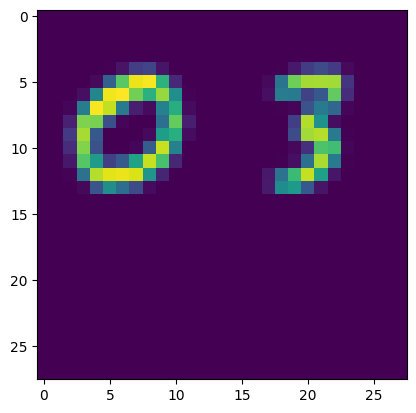

In [2]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale if not already
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data_path = 'double_mnist/train'
val_data_path = 'double_mnist/val'
test_data_path = 'double_mnist/test'
class CustomImageFolder(ImageFolder):
    def __init__(self, root, transform=None):
        super(CustomImageFolder, self).__init__(root, transform=transform)
    
    def __getitem__(self, index):
        path, target = self.samples[index]
        sample = self.loader(path)
        if self.transform is not None:
            sample = self.transform(sample)

        # Assign labels based on folder name
        folder_name = os.path.basename(os.path.dirname(path))
        return sample, int(folder_name)  # Convert the folder name to an integer label
# Create ImageFolder datasets for training, validation, and test sets
train_dataset = CustomImageFolder(train_data_path, transform=transform)
val_dataset = CustomImageFolder(val_data_path, transform=transform)
test_dataset = CustomImageFolder(test_data_path, transform=transform)
print(train_dataset.classes)
class_to_label = {str(i).zfill(2): i for i in range(100)}
# Define batch sizes
batch_size = 64
print(train_dataset)
# Create DataLoader instances for training, validation, and test sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Number of classes
num_classes = 10

class_names = train_dataset.classes
class_names = val_dataset.classes

print(class_names)

for images, labels in train_loader:
    print(labels)
    break
for images, labels in val_loader:
    plt.imshow(images[0].permute(1, 2, 0))
    print(labels[0])
    print(labels)
    break




In [17]:
class SimpleCNN(nn.Module):
    def __init__(self, input_channels, num_classes, kernel_size=3, pool_size=2, stride=2, dropout_rate=0.5):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, 32, kernel_size=kernel_size, padding=int((kernel_size - 1) / 2))
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=pool_size, stride=stride)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=kernel_size, padding=int((kernel_size - 1) / 2))
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=pool_size, stride=stride)
        var1 = int((28 - pool_size) / stride) + 1
        self.dim = int((var1 - pool_size) / stride) + 1
        self.fc1 = nn.Linear(64 * self.dim * self.dim, 128)
        self.relu3 = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(-1, 64 * self.dim * self.dim)
        x = self.relu3(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = SimpleCNN(input_channels=1, num_classes=num_classes)
model1 = SimpleCNN(input_channels=1, num_classes=num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion1 = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.001)

In [19]:
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    correct_train = 0
    total_train = 0
    cnt = 0
    for images, labels in train_loader:
        labels1 = labels//10
        labels2 = labels%10
        # class_names = train_dataset.classes
        optimizer1.zero_grad()
        optimizer.zero_grad()
        image = images.clone()
        image1 = images.clone()
        left_half = images[:, :, :, :images.shape[3] // 2]
        # print(left_half.shape)
        image[:, :, :, (image.shape[3] // 2):] = left_half
        right_half = images[:, :, :, images.shape[3] // 2 :]
        image1[:, :, :, :(image1.shape[3] // 2)] = right_half
        # print(images.shape)
        outputs = model(image)
        outputs1 = model1(image1)
        loss = criterion(outputs, labels1)
        loss1 = criterion1(outputs1,labels2)
        loss.backward()
        loss1.backward()
        optimizer.step()
        optimizer1.step()
        total_train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        _, predicted1 = torch.max(outputs1.data, 1)
        total_train += 2*labels.size(0)
        for i in range(labels.size(0)):
            # cnt += 1
            # if(cnt == 10):
            #     print(predicted[i])
            #     print(predicted1[i])
            #     print(labels[i])
            #     cnt=0
            #     break
            if(predicted[i] == labels[i]//10):
                correct_train += 1
            if(predicted1[i] == labels[i]%10):
                correct_train += 1
        # cnt += 1
        # if(cnt == 10):
        #     break
    train_accuracy = 100 * correct_train / total_train
    average_train_loss = total_train_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{num_epochs} - Train Loss: {average_train_loss:.4f} - Train Accuracy: {train_accuracy:.2f}%')
    model.eval()
    model1.eval()
    total_val_loss = 0
    correct_val = 0
    total_val = 0
    cnt = 0
    with torch.no_grad():
        for images, labels in val_loader:
            labels1 = labels // 10
            labels2 = labels % 10
            image = images.clone()
            image1 = images.clone()
            left_half = images[:, :, :, :images.shape[3] // 2]
            image[:, :, :, (image.shape[3] // 2):] = left_half
            right_half = images[:, :, :, images.shape[3] // 2 :]
            image1[:, :, :, :(image1.shape[3] // 2)] = right_half
            outputs = model(image)
            outputs1 = model1(image1)
            loss = criterion(outputs, labels1)
            loss1 = criterion1(outputs1,labels2)
            total_val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            _, predicted1 = torch.max(outputs1.data, 1)
            total_val += 2*labels.size(0)
            for i in range(labels.size(0)):
                if(predicted[i] == labels[i]//10):
                    correct_val += 1
                if(predicted1[i] == labels[i]%10):
                    correct_val += 1
    val_accuracy = 100 * correct_val / total_val
    average_val_loss = total_val_loss / len(val_loader)
    print(f'Epoch {epoch + 1}/{num_epochs} - Validation Loss: {average_val_loss:.4f} - Validation Accuracy: {val_accuracy:.2f}%')
    model.eval()
    model1.eval()
    total_val_loss = 0
    correct_val = 0
    total_val = 0
    cnt = 0
    with torch.no_grad():
        for images, labels in test_loader:
            labels1 = labels // 10
            labels2 = labels % 10
            image = images.clone()
            image1 = images.clone()
            left_half = images[:, :, :, :images.shape[3] // 2]
            image[:, :, :, (image.shape[3] // 2):] = left_half
            right_half = images[:, :, :, images.shape[3] // 2 :]
            image1[:, :, :, :(image1.shape[3] // 2)] = right_half
            outputs = model(image)
            outputs1 = model1(image1)
            loss = criterion(outputs, labels1)
            loss1 = criterion1(outputs1,labels2)
            total_val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            _, predicted1 = torch.max(outputs1.data, 1)
            total_val += 2*labels.size(0)
            for i in range(labels.size(0)):
                if(predicted[i] == labels[i]//10):
                    correct_val += 1
                if(predicted1[i] == labels[i]%10):
                    correct_val += 1
    val_accuracy = 100 * correct_val / total_val
    average_val_loss = total_val_loss / len(test_loader)
    print(f'Epoch {epoch + 1}/{num_epochs} - Testing Loss: {average_val_loss:.4f} - Testing Accuracy: {val_accuracy:.2f}%')


Epoch 1/5 - Train Loss: 0.1039 - Train Accuracy: 96.81%
Epoch 1/5 - Validation Loss: 0.0837 - Validation Accuracy: 97.25%
Epoch 1/5 - Testing Loss: 0.0879 - Testing Accuracy: 97.08%
Epoch 2/5 - Train Loss: 0.0867 - Train Accuracy: 98.02%
Epoch 2/5 - Validation Loss: 0.0832 - Validation Accuracy: 97.44%
Epoch 2/5 - Testing Loss: 0.0866 - Testing Accuracy: 97.42%
Epoch 3/5 - Train Loss: 0.0796 - Train Accuracy: 98.25%
Epoch 3/5 - Validation Loss: 0.0773 - Validation Accuracy: 97.48%
Epoch 3/5 - Testing Loss: 0.0819 - Testing Accuracy: 97.59%
Epoch 4/5 - Train Loss: 0.0728 - Train Accuracy: 98.42%
Epoch 4/5 - Validation Loss: 0.0863 - Validation Accuracy: 97.60%
Epoch 4/5 - Testing Loss: 0.0932 - Testing Accuracy: 97.58%
Epoch 5/5 - Train Loss: 0.0635 - Train Accuracy: 98.62%
Epoch 5/5 - Validation Loss: 0.0839 - Validation Accuracy: 97.74%
Epoch 5/5 - Testing Loss: 0.0784 - Testing Accuracy: 97.82%


In [58]:
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    correct_train = 0
    total_train = 0
    cnt = 0
    for images, labels in train_loader:
        labels1 = labels//10
        # class_names = train_dataset.classes
        optimizer.zero_grad()
        image = images.clone()
        left_half = images[:, :, :, :images.shape[3] // 2]
        # print(left_half.shape)
        image[:, :, :, (image.shape[3] // 2):] = left_half
        # print(images.shape)
        outputs = model(image)
        loss = criterion(outputs, labels1)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        for i in range(labels.size(0)):
            if(predicted[i] == labels1[i]):
                correct_train += 1
        # cnt += 1
        # if(cnt == 10):
        #     break
    train_accuracy = 100 * correct_train / total_train
    average_train_loss = total_train_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{num_epochs} - Train Loss: {average_train_loss:.4f} - Train Accuracy: {train_accuracy:.2f}%')
    model.eval()
    total_val_loss = 0
    correct_val = 0
    total_val = 0
    cnt = 0
    with torch.no_grad():
        for images, labels in val_loader:
            labels1 = labels // 10
            image = images.clone()
            left_half = images[:, :, :, :images.shape[3] // 2]
            image[:, :, :, (image.shape[3] // 2):] = left_half
            outputs = model(image)
            loss = criterion(outputs, labels1)
            total_val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels1).sum().item()
            cnt += 1
            # if(cnt == 10):
            #     print(predicted)
            #     print(labels1)
            #     print(labels)
            #     break
    val_accuracy = 100 * correct_val / total_val
    average_val_loss = total_val_loss / len(val_loader)
    print(f'Epoch {epoch + 1}/{num_epochs} - Validation Loss: {average_val_loss:.4f} - Validation Accuracy: {val_accuracy:.2f}%')
    model.eval()
    total_val_loss = 0
    correct_val = 0
    total_val = 0
    cnt = 0
    with torch.no_grad():
        for images, labels in test_loader:
            labels1 = labels // 10
            image = images.clone()
            left_half = images[:, :, :, :images.shape[3] // 2]
            image[:, :, :, (image.shape[3] // 2):] = left_half
            outputs = model(image)
            loss = criterion(outputs, labels1)
            total_val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels1).sum().item()
            cnt += 1
            # if(cnt == 10):
            #     print(predicted)
            #     print(labels1)
            #     print(labels)
            #     break
    val_accuracy = 100 * correct_val / total_val
    average_val_loss = total_val_loss / len(test_loader)
    print(f'Epoch {epoch + 1}/{num_epochs} - Testing Loss: {average_val_loss:.4f} - Testing Accuracy: {val_accuracy:.2f}%')


Epoch 1/5 - Train Loss: 0.1171 - Train Accuracy: 96.44%
Epoch 1/5 - Validation Loss: 0.0829 - Validation Accuracy: 97.42%
Epoch 1/5 - Testing Loss: 0.0991 - Testing Accuracy: 97.00%
Epoch 2/5 - Train Loss: 0.1029 - Train Accuracy: 96.87%
Epoch 2/5 - Validation Loss: 0.0755 - Validation Accuracy: 97.78%
Epoch 2/5 - Testing Loss: 0.0821 - Testing Accuracy: 97.47%
Epoch 3/5 - Train Loss: 0.0926 - Train Accuracy: 97.21%
Epoch 3/5 - Validation Loss: 0.0868 - Validation Accuracy: 97.53%
Epoch 3/5 - Testing Loss: 0.0810 - Testing Accuracy: 97.75%
Epoch 4/5 - Train Loss: 0.0836 - Train Accuracy: 97.35%
Epoch 4/5 - Validation Loss: 0.0753 - Validation Accuracy: 97.86%
Epoch 4/5 - Testing Loss: 0.0861 - Testing Accuracy: 97.48%
Epoch 5/5 - Train Loss: 0.0785 - Train Accuracy: 97.52%
Epoch 5/5 - Validation Loss: 0.0758 - Validation Accuracy: 97.85%
Epoch 5/5 - Testing Loss: 0.0923 - Testing Accuracy: 97.39%


In [59]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [60]:
num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    correct_train = 0
    total_train = 0
    cnt = 0
    for images, labels in train_loader:
        labels1 = labels % 10
        # class_names = train_dataset.classes
        optimizer.zero_grad()
        image = images.clone()
        left_half = images[:, :, :, images.shape[3] // 2:]
        # print(left_half.shape)
        image[:, :, :, :(image.shape[3] // 2)] = left_half
        # print(images.shape)
        outputs = model(image)
        loss = criterion(outputs, labels1)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        for i in range(labels.size(0)):
            if(predicted[i] == labels1[i]):
                correct_train += 1
        # cnt += 1
        # if(cnt == 10):
        #     break
    train_accuracy = 100 * correct_train / total_train
    average_train_loss = total_train_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{num_epochs} - Train Loss: {average_train_loss:.4f} - Train Accuracy: {train_accuracy:.2f}%')
    model.eval()
    total_val_loss = 0
    correct_val = 0
    total_val = 0
    cnt = 0
    with torch.no_grad():
        for images, labels in val_loader:
            labels1 = labels % 10
            image = images.clone()
            left_half = images[:, :, :, images.shape[3] // 2:]
            image[:, :, :, :(image.shape[3] // 2)] = left_half
            outputs = model(image)
            loss = criterion(outputs, labels1)
            total_val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels1).sum().item()
            cnt += 1
            # if(cnt == 10):
            #     print(predicted)
            #     print(labels1)
            #     print(labels)
            #     break
    val_accuracy = 100 * correct_val / total_val
    average_val_loss = total_val_loss / len(val_loader)
    print(f'Epoch {epoch + 1}/{num_epochs} - Validation Loss: {average_val_loss:.4f} - Validation Accuracy: {val_accuracy:.2f}%')
    model.eval()
    total_val_loss = 0
    correct_val = 0
    total_val = 0
    cnt = 0
    with torch.no_grad():
        for images, labels in test_loader:
            labels1 = labels % 10
            image = images.clone()
            left_half = images[:, :, :, images.shape[3] // 2:]
            image[:, :, :, :(image.shape[3] // 2)] = left_half
            outputs = model(image)
            loss = criterion(outputs, labels1)
            total_val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels1).sum().item()
            cnt += 1
            # if(cnt == 10):
            #     print(predicted)
            #     print(labels1)
            #     print(labels)
            #     break
    val_accuracy = 100 * correct_val / total_val
    average_val_loss = total_val_loss / len(test_loader)
    print(f'Epoch {epoch + 1}/{num_epochs} - Testing Loss: {average_val_loss:.4f} - Testing Accuracy: {val_accuracy:.2f}%')


Epoch 1/3 - Train Loss: 0.1110 - Train Accuracy: 96.71%
Epoch 1/3 - Validation Loss: 0.0776 - Validation Accuracy: 97.67%
Epoch 1/3 - Testing Loss: 0.0646 - Testing Accuracy: 97.91%
Epoch 2/3 - Train Loss: 0.0867 - Train Accuracy: 97.27%
Epoch 2/3 - Validation Loss: 0.0762 - Validation Accuracy: 97.79%
Epoch 2/3 - Testing Loss: 0.0794 - Testing Accuracy: 97.61%
Epoch 3/3 - Train Loss: 0.0784 - Train Accuracy: 97.59%
Epoch 3/3 - Validation Loss: 0.0668 - Validation Accuracy: 98.06%
Epoch 3/3 - Testing Loss: 0.0618 - Testing Accuracy: 97.95%
